<a href="https://www.kaggle.com/code/pollukenpinedo/brawlstarsanalisis?scriptVersionId=162108801" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/brawl-stars-logs-and-metadata-2023/player_metadata.csv')

data = data.sort_values(by='player_id', ascending=False)
data.head()
#El tiempo del registro de batalla, primero es la fecha, luego "T" y despues horas minutos y segundos del log
#la duracion viene dada en segundos

,player_id,name,nameColor,trophies,highestTrophies,highestPowerPlayPoints,expLevel,expPoints,isQualifiedFromChampionshipChallenge,3vs3Victories,soloVictories,duoVictories,bestRoboRumbleTime,bestTimeAsBigBrawler,brawlers,icon_id,club_tag,club_name
15052,#YYYQJ8VG,『Hidde ♡ Kuba』,0xfff05637,56905,58101,908.0,341,592137,False,27789,2126,7456,8,0,"[{'id': 16000000, 'name': 'SHELLY', 'power': 1...",28000047,#2GLGLPVYJ,Bawz Army
1242,#YYYGRUVQ,314Сhоясh•G🍥,0xffffffff,33368,44983,1166.0,308,484992,False,27988,2348,1819,5,0,"[{'id': 16000000, 'name': 'SHELLY', 'power': 9...",28000075,NaN,NaN
1237,#YYYGRUVQ,314Сhоясh•G🍥,0xffffffff,33368,44983,1166.0,308,484992,False,27988,2348,1819,5,0,"[{'id': 16000000, 'name': 'SHELLY', 'power': 9...",28000075,NaN,NaN
1247,#YYYGRUVQ,314Сhоясh•G🍥,0xffffffff,33368,44983,1166.0,308,484992,False,27988,2348,1819,5,0,"[{'id': 16000000, 'name': 'SHELLY', 'power': 9...",28000075,NaN,NaN
22045,#YYYC2Q8P,『Luɨs™ϟ』,0xffcb5aff,31126,37020,1039.0,283,409930,False,23472,751,1955,5,0,"[{'id': 16000000, 'name': 'SHELLY', 'power': 9...",28000170,NaN,NaN



# Limpieza de los datos 😸

---
Como se puede apreciar en la celda anterior, se cuenta con registros duplicados en los metadatos del jugador, por lo que se va a hacer la eliminacion de esos registros duplicados


---

## Limpiando Players Metadata


In [3]:
#Eliminando duplicados
metadata_ND = data.drop_duplicates(subset='player_id')

data = data.sort_values(by='player_id', ascending=False)
metadata_ND.head()

,player_id,name,nameColor,trophies,highestTrophies,highestPowerPlayPoints,expLevel,expPoints,isQualifiedFromChampionshipChallenge,3vs3Victories,soloVictories,duoVictories,bestRoboRumbleTime,bestTimeAsBigBrawler,brawlers,icon_id,club_tag,club_name
15052,#YYYQJ8VG,『Hidde ♡ Kuba』,0xfff05637,56905,58101,908.0,341,592137,False,27789,2126,7456,8,0,"[{'id': 16000000, 'name': 'SHELLY', 'power': 1...",28000047,#2GLGLPVYJ,Bawz Army
1242,#YYYGRUVQ,314Сhоясh•G🍥,0xffffffff,33368,44983,1166.0,308,484992,False,27988,2348,1819,5,0,"[{'id': 16000000, 'name': 'SHELLY', 'power': 9...",28000075,NaN,NaN
22045,#YYYC2Q8P,『Luɨs™ϟ』,0xffcb5aff,31126,37020,1039.0,283,409930,False,23472,751,1955,5,0,"[{'id': 16000000, 'name': 'SHELLY', 'power': 9...",28000170,NaN,NaN
12767,#YYVJUCP9,NeOn,0xfff05637,30034,33260,888.0,257,336708,False,12956,1995,3607,5,0,"[{'id': 16000000, 'name': 'SHELLY', 'power': 9...",28000128,NaN,NaN
5821,#YYV89VU2,LouiseG✿,0xffcb5aff,38866,40833,992.0,370,695912,False,43253,2155,2802,6,0,"[{'id': 16000000, 'name': 'SHELLY', 'power': 1...",28000166,#2J200JUQ0,Funados NA


## Registros de batalla

Para los registros de batalla se hara la separacion de las batallas que cuentan con un equipo, es decir, se analizaran las batallas que no son de showdown para poder conseguir distintos datos como los brawlers mas usados o los que fueron usados y estelares con mas ocurrencias, etc.

In [4]:
batallas = pd.read_csv("/kaggle/input/brawl-stars-logs-and-metadata-2023/raw_battlelogs.csv")

In [5]:
batallas.head()

,battleTime,event_id,event_mode,event_map,battle_mode,battle_type,battle_result,battle_duration,battle_trophyChange,battle_starPlayer_tag,...,player_id,battle_starPlayer,battle_bigBrawler_tag,battle_bigBrawler_name,battle_bigBrawler_brawler_id,battle_bigBrawler_brawler_name,battle_bigBrawler_brawler_power,battle_bigBrawler_brawler_trophies,battle_level_name,battle_level_id
0,20230210T160712.000Z,15000012,gemGrab,Deep Diner,gemGrab,ranked,defeat,125.0,-8.0,#9V9QVV99V,...,#8Y9QGR0U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20230210T160425.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,46.0,-8.0,#8GRC2PJRC,...,#8Y9QGR0U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20230210T160150.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,89.0,-7.0,#Q2P0U08C,...,#8Y9QGR0U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20230210T155921.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,150.0,-7.0,#2UG2LU09G,...,#8Y9QGR0U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20230210T155529.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,victory,65.0,8.0,#8Y9QGR0U,...,#8Y9QGR0U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Eliminar columnas
columnas_a_eliminar = ['battle_bigBrawler_brawler_id','battle_bigBrawler_brawler_name','battle_bigBrawler_brawler_power','battle_bigBrawler_brawler_trophies','battle_level_name']
batallas = batallas.drop(columns=columnas_a_eliminar)
batallas.head()

,battleTime,event_id,event_mode,event_map,battle_mode,battle_type,battle_result,battle_duration,battle_trophyChange,battle_starPlayer_tag,...,battle_starPlayer_brawler_power,battle_starPlayer_brawler_trophies,battle_teams,battle_rank,battle_players,player_id,battle_starPlayer,battle_bigBrawler_tag,battle_bigBrawler_name,battle_level_id
0,20230210T160712.000Z,15000012,gemGrab,Deep Diner,gemGrab,ranked,defeat,125.0,-8.0,#9V9QVV99V,...,11.0,791.0,"[[{'tag': '#2GVQYJP90', 'name': 'Mr. ???', 'br...",NaN,NaN,#8Y9QGR0U,NaN,NaN,NaN,NaN
1,20230210T160425.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,46.0,-8.0,#8GRC2PJRC,...,11.0,782.0,"[[{'tag': '#8GRC2PJRC', 'name': 'Willycha', 'b...",NaN,NaN,#8Y9QGR0U,NaN,NaN,NaN,NaN
2,20230210T160150.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,89.0,-7.0,#Q2P0U08C,...,10.0,681.0,"[[{'tag': '#JQ98CL8', 'name': 'RA93', 'brawler...",NaN,NaN,#8Y9QGR0U,NaN,NaN,NaN,NaN
3,20230210T155921.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,150.0,-7.0,#2UG2LU09G,...,10.0,641.0,"[[{'tag': '#2UG2LU09G', 'name': 'stinkysocks',...",NaN,NaN,#8Y9QGR0U,NaN,NaN,NaN,NaN
4,20230210T155529.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,victory,65.0,8.0,#8Y9QGR0U,...,11.0,419.0,"[[{'tag': '#PJ0Y2VRL2', 'name': 'Meliodas', 'b...",NaN,NaN,#8Y9QGR0U,NaN,NaN,NaN,NaN


## Data Frame para Batallas de Showdown

Para este paso se analizaron las columnas que contenian datos para las batallas de solo showdown y se recolectaron en un mismo data frame

In [7]:
batallas_solo_showdown = batallas[batallas['battle_mode'] == 'soloShowdown'][['battleTime', 'event_id', 'event_mode', 'event_map', 'battle_mode', 'battle_type', 'battle_trophyChange', 'battle_rank','player_id']]
batallas_solo_showdown.head()

,battleTime,event_id,event_mode,event_map,battle_mode,battle_type,battle_trophyChange,battle_rank,player_id
7,20230210T154642.000Z,15000033,soloShowdown,Cavern Churn,soloShowdown,ranked,-6.0,9.0,#8Y9QGR0U
10,20230208T201658.000Z,0,NaN,NaN,soloShowdown,friendly,NaN,4.0,#8Y9QGR0U
11,20230208T201601.000Z,0,NaN,NaN,soloShowdown,friendly,NaN,1.0,#8Y9QGR0U
12,20230208T201511.000Z,0,NaN,NaN,soloShowdown,friendly,NaN,1.0,#8Y9QGR0U
13,20230208T200922.000Z,0,NaN,NaN,soloShowdown,friendly,NaN,3.0,#8Y9QGR0U


---
* Limpiando los valores de partidas amistosas de los campos de event id = 0, event_mode, battle_map y cambio de trofeos "NaN" 
---

In [8]:
# Reemplazar varios valores en una columna
reemplazos = { np.nan: "amistoso"}
batallas_solo_showdown['event_mode'] = batallas_solo_showdown['event_mode'].replace(reemplazos)
batallas_solo_showdown['event_map'] = batallas_solo_showdown['event_map'].replace(reemplazos)
batallas_solo_showdown['battle_trophyChange'] = batallas_solo_showdown['battle_trophyChange'].replace(reemplazos)

batallas_solo_showdown.head()

,battleTime,event_id,event_mode,event_map,battle_mode,battle_type,battle_trophyChange,battle_rank,player_id
7,20230210T154642.000Z,15000033,soloShowdown,Cavern Churn,soloShowdown,ranked,-6.0,9.0,#8Y9QGR0U
10,20230208T201658.000Z,0,amistoso,amistoso,soloShowdown,friendly,amistoso,4.0,#8Y9QGR0U
11,20230208T201601.000Z,0,amistoso,amistoso,soloShowdown,friendly,amistoso,1.0,#8Y9QGR0U
12,20230208T201511.000Z,0,amistoso,amistoso,soloShowdown,friendly,amistoso,1.0,#8Y9QGR0U
13,20230208T200922.000Z,0,amistoso,amistoso,soloShowdown,friendly,amistoso,3.0,#8Y9QGR0U


In [9]:
# Convertir la cadena de fecha y hora a objetos datetime
batallas_solo_showdown['battleTime'] = pd.to_datetime(batallas_solo_showdown['battleTime'], format='%Y%m%dT%H%M%S.%fZ')

# Crear columnas separadas para la fecha y la hora
batallas_solo_showdown['fecha'] = batallas_solo_showdown['battleTime'].dt.date
batallas_solo_showdown['hora'] = batallas_solo_showdown['battleTime'].dt.time

# Mostrar el resultado
batallas_solo_showdown.head()

,battleTime,event_id,event_mode,event_map,battle_mode,battle_type,battle_trophyChange,battle_rank,player_id,fecha,hora
7,2023-02-10 15:46:42,15000033,soloShowdown,Cavern Churn,soloShowdown,ranked,-6.0,9.0,#8Y9QGR0U,2023-02-10,15:46:42
10,2023-02-08 20:16:58,0,amistoso,amistoso,soloShowdown,friendly,amistoso,4.0,#8Y9QGR0U,2023-02-08,20:16:58
11,2023-02-08 20:16:01,0,amistoso,amistoso,soloShowdown,friendly,amistoso,1.0,#8Y9QGR0U,2023-02-08,20:16:01
12,2023-02-08 20:15:11,0,amistoso,amistoso,soloShowdown,friendly,amistoso,1.0,#8Y9QGR0U,2023-02-08,20:15:11
13,2023-02-08 20:09:22,0,amistoso,amistoso,soloShowdown,friendly,amistoso,3.0,#8Y9QGR0U,2023-02-08,20:09:22


In [10]:
batallas_solo_showdown.to_csv("soloshowdown_battles.csv")

### Data Frame para batallas showdown duo

In [11]:
batallas_duo_showdown = batallas[batallas['battle_mode'] == 'duoShowdown'][['battleTime', 'event_id', 'event_mode', 'event_map', 'battle_mode', 'battle_type', 'battle_trophyChange', 'battle_rank','player_id','battle_teams']]
batallas_duo_showdown.head()

,battleTime,event_id,event_mode,event_map,battle_mode,battle_type,battle_trophyChange,battle_rank,player_id,battle_teams
656,20230117T161438.000Z,15000035,duoShowdown,Scorched Stone,duoShowdown,ranked,-5.0,4.0,#CJ9JP29,"[[{'tag': '#PV88J9RUG', 'name': 'Nelson', 'bra..."
657,20230117T161214.000Z,15000035,duoShowdown,Scorched Stone,duoShowdown,ranked,NaN,3.0,#CJ9JP29,"[[{'tag': '#2YY2CCQG8', 'name': 'AntoniG🦖', 'b..."
658,20230117T161006.000Z,15000035,duoShowdown,Scorched Stone,duoShowdown,ranked,-5.0,4.0,#CJ9JP29,"[[{'tag': '#90V0C2PLR', 'name': 'carlitosUwU',..."
659,20230117T160813.000Z,15000035,duoShowdown,Scorched Stone,duoShowdown,ranked,NaN,3.0,#CJ9JP29,"[[{'tag': '#LPL89Q8G', 'name': 'THANOS_YT', 'b..."
660,20230117T160552.000Z,15000035,duoShowdown,Scorched Stone,duoShowdown,ranked,7.0,2.0,#CJ9JP29,"[[{'tag': '#Y90P9J9LU', 'name': 'cris', 'brawl..."


In [12]:
# Convertir la cadena de fecha y hora a objetos datetime
batallas_duo_showdown['battleTime'] = pd.to_datetime(batallas_duo_showdown['battleTime'], format='%Y%m%dT%H%M%S.%fZ')

# Crear columnas separadas para la fecha y la hora
batallas_duo_showdown['fecha'] = batallas_duo_showdown['battleTime'].dt.date
batallas_duo_showdown['hora'] = batallas_duo_showdown['battleTime'].dt.time

# Mostrar el resultado
batallas_duo_showdown.head()

,battleTime,event_id,event_mode,event_map,battle_mode,battle_type,battle_trophyChange,battle_rank,player_id,battle_teams,fecha,hora
656,2023-01-17 16:14:38,15000035,duoShowdown,Scorched Stone,duoShowdown,ranked,-5.0,4.0,#CJ9JP29,"[[{'tag': '#PV88J9RUG', 'name': 'Nelson', 'bra...",2023-01-17,16:14:38
657,2023-01-17 16:12:14,15000035,duoShowdown,Scorched Stone,duoShowdown,ranked,NaN,3.0,#CJ9JP29,"[[{'tag': '#2YY2CCQG8', 'name': 'AntoniG🦖', 'b...",2023-01-17,16:12:14
658,2023-01-17 16:10:06,15000035,duoShowdown,Scorched Stone,duoShowdown,ranked,-5.0,4.0,#CJ9JP29,"[[{'tag': '#90V0C2PLR', 'name': 'carlitosUwU',...",2023-01-17,16:10:06
659,2023-01-17 16:08:13,15000035,duoShowdown,Scorched Stone,duoShowdown,ranked,NaN,3.0,#CJ9JP29,"[[{'tag': '#LPL89Q8G', 'name': 'THANOS_YT', 'b...",2023-01-17,16:08:13
660,2023-01-17 16:05:52,15000035,duoShowdown,Scorched Stone,duoShowdown,ranked,7.0,2.0,#CJ9JP29,"[[{'tag': '#Y90P9J9LU', 'name': 'cris', 'brawl...",2023-01-17,16:05:52


In [13]:
batallas_duo_showdown.to_csv('Duo_Battles.csv')

### Data frame para batallas en Equipo

In [14]:
batallas_team = batallas.dropna(subset=['battle_teams'])
batallas_team.head()

,battleTime,event_id,event_mode,event_map,battle_mode,battle_type,battle_result,battle_duration,battle_trophyChange,battle_starPlayer_tag,...,battle_starPlayer_brawler_power,battle_starPlayer_brawler_trophies,battle_teams,battle_rank,battle_players,player_id,battle_starPlayer,battle_bigBrawler_tag,battle_bigBrawler_name,battle_level_id
0,20230210T160712.000Z,15000012,gemGrab,Deep Diner,gemGrab,ranked,defeat,125.0,-8.0,#9V9QVV99V,...,11.0,791.0,"[[{'tag': '#2GVQYJP90', 'name': 'Mr. ???', 'br...",NaN,NaN,#8Y9QGR0U,NaN,NaN,NaN,NaN
1,20230210T160425.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,46.0,-8.0,#8GRC2PJRC,...,11.0,782.0,"[[{'tag': '#8GRC2PJRC', 'name': 'Willycha', 'b...",NaN,NaN,#8Y9QGR0U,NaN,NaN,NaN,NaN
2,20230210T160150.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,89.0,-7.0,#Q2P0U08C,...,10.0,681.0,"[[{'tag': '#JQ98CL8', 'name': 'RA93', 'brawler...",NaN,NaN,#8Y9QGR0U,NaN,NaN,NaN,NaN
3,20230210T155921.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,150.0,-7.0,#2UG2LU09G,...,10.0,641.0,"[[{'tag': '#2UG2LU09G', 'name': 'stinkysocks',...",NaN,NaN,#8Y9QGR0U,NaN,NaN,NaN,NaN
4,20230210T155529.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,victory,65.0,8.0,#8Y9QGR0U,...,11.0,419.0,"[[{'tag': '#PJ0Y2VRL2', 'name': 'Meliodas', 'b...",NaN,NaN,#8Y9QGR0U,NaN,NaN,NaN,NaN


In [15]:
# Eliminar filas donde el valor en 'columna_especifica' es igual a cierto valor (por ejemplo, 3)
valor_a_eliminar = 'duoShowdown'
batallas_team = batallas_team[batallas_team['battle_mode'] != valor_a_eliminar]
batallas_team.head()

,battleTime,event_id,event_mode,event_map,battle_mode,battle_type,battle_result,battle_duration,battle_trophyChange,battle_starPlayer_tag,...,battle_starPlayer_brawler_power,battle_starPlayer_brawler_trophies,battle_teams,battle_rank,battle_players,player_id,battle_starPlayer,battle_bigBrawler_tag,battle_bigBrawler_name,battle_level_id
0,20230210T160712.000Z,15000012,gemGrab,Deep Diner,gemGrab,ranked,defeat,125.0,-8.0,#9V9QVV99V,...,11.0,791.0,"[[{'tag': '#2GVQYJP90', 'name': 'Mr. ???', 'br...",NaN,NaN,#8Y9QGR0U,NaN,NaN,NaN,NaN
1,20230210T160425.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,46.0,-8.0,#8GRC2PJRC,...,11.0,782.0,"[[{'tag': '#8GRC2PJRC', 'name': 'Willycha', 'b...",NaN,NaN,#8Y9QGR0U,NaN,NaN,NaN,NaN
2,20230210T160150.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,89.0,-7.0,#Q2P0U08C,...,10.0,681.0,"[[{'tag': '#JQ98CL8', 'name': 'RA93', 'brawler...",NaN,NaN,#8Y9QGR0U,NaN,NaN,NaN,NaN
3,20230210T155921.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,150.0,-7.0,#2UG2LU09G,...,10.0,641.0,"[[{'tag': '#2UG2LU09G', 'name': 'stinkysocks',...",NaN,NaN,#8Y9QGR0U,NaN,NaN,NaN,NaN
4,20230210T155529.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,victory,65.0,8.0,#8Y9QGR0U,...,11.0,419.0,"[[{'tag': '#PJ0Y2VRL2', 'name': 'Meliodas', 'b...",NaN,NaN,#8Y9QGR0U,NaN,NaN,NaN,NaN


In [16]:
#Eliminar las columnas con NaN
columnas_a_eliminar = ['battle_rank','battle_starPlayer','battle_bigBrawler_tag','battle_bigBrawler_name','battle_level_id']
batallas_team = batallas_team.drop(columns=columnas_a_eliminar)
batallas_team.head()

,battleTime,event_id,event_mode,event_map,battle_mode,battle_type,battle_result,battle_duration,battle_trophyChange,battle_starPlayer_tag,battle_starPlayer_name,battle_starPlayer_brawler_id,battle_starPlayer_brawler_name,battle_starPlayer_brawler_power,battle_starPlayer_brawler_trophies,battle_teams,battle_players,player_id
0,20230210T160712.000Z,15000012,gemGrab,Deep Diner,gemGrab,ranked,defeat,125.0,-8.0,#9V9QVV99V,juanlexis,16000012.0,CROW,11.0,791.0,"[[{'tag': '#2GVQYJP90', 'name': 'Mr. ???', 'br...",NaN,#8Y9QGR0U
1,20230210T160425.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,46.0,-8.0,#8GRC2PJRC,Willycha,16000004.0,RICO,11.0,782.0,"[[{'tag': '#8GRC2PJRC', 'name': 'Willycha', 'b...",NaN,#8Y9QGR0U
2,20230210T160150.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,89.0,-7.0,#Q2P0U08C,Jutax,16000034.0,JACKY,10.0,681.0,"[[{'tag': '#JQ98CL8', 'name': 'RA93', 'brawler...",NaN,#8Y9QGR0U
3,20230210T155921.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,150.0,-7.0,#2UG2LU09G,stinkysocks,16000023.0,LEON,10.0,641.0,"[[{'tag': '#2UG2LU09G', 'name': 'stinkysocks',...",NaN,#8Y9QGR0U
4,20230210T155529.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,victory,65.0,8.0,#8Y9QGR0U,nat ♡,16000062.0,BUSTER,11.0,419.0,"[[{'tag': '#PJ0Y2VRL2', 'name': 'Meliodas', 'b...",NaN,#8Y9QGR0U


In [17]:
#Eliminar las columnas con NaN
columnas_a_eliminar = ['battle_players']
batallas_team = batallas_team.drop(columns=columnas_a_eliminar)
batallas_team.head()

,battleTime,event_id,event_mode,event_map,battle_mode,battle_type,battle_result,battle_duration,battle_trophyChange,battle_starPlayer_tag,battle_starPlayer_name,battle_starPlayer_brawler_id,battle_starPlayer_brawler_name,battle_starPlayer_brawler_power,battle_starPlayer_brawler_trophies,battle_teams,player_id
0,20230210T160712.000Z,15000012,gemGrab,Deep Diner,gemGrab,ranked,defeat,125.0,-8.0,#9V9QVV99V,juanlexis,16000012.0,CROW,11.0,791.0,"[[{'tag': '#2GVQYJP90', 'name': 'Mr. ???', 'br...",#8Y9QGR0U
1,20230210T160425.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,46.0,-8.0,#8GRC2PJRC,Willycha,16000004.0,RICO,11.0,782.0,"[[{'tag': '#8GRC2PJRC', 'name': 'Willycha', 'b...",#8Y9QGR0U
2,20230210T160150.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,89.0,-7.0,#Q2P0U08C,Jutax,16000034.0,JACKY,10.0,681.0,"[[{'tag': '#JQ98CL8', 'name': 'RA93', 'brawler...",#8Y9QGR0U
3,20230210T155921.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,150.0,-7.0,#2UG2LU09G,stinkysocks,16000023.0,LEON,10.0,641.0,"[[{'tag': '#2UG2LU09G', 'name': 'stinkysocks',...",#8Y9QGR0U
4,20230210T155529.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,victory,65.0,8.0,#8Y9QGR0U,nat ♡,16000062.0,BUSTER,11.0,419.0,"[[{'tag': '#PJ0Y2VRL2', 'name': 'Meliodas', 'b...",#8Y9QGR0U


## Tratar el campo de fecha de batalla

hacer dos columnas para la fecha una que tenga la fecha con dia mes y año y la otra que tenga la hora de inicio de la batalla

In [18]:
# Convertir la cadena de fecha y hora a objetos datetime
batallas_team['battleTime'] = pd.to_datetime(batallas_team['battleTime'], format='%Y%m%dT%H%M%S.%fZ')

# Crear columnas separadas para la fecha y la hora
batallas_team['fecha'] = batallas_team['battleTime'].dt.date
batallas_team['hora'] = batallas_team['battleTime'].dt.time

# Mostrar el resultado
batallas_team.head()

,battleTime,event_id,event_mode,event_map,battle_mode,battle_type,battle_result,battle_duration,battle_trophyChange,battle_starPlayer_tag,battle_starPlayer_name,battle_starPlayer_brawler_id,battle_starPlayer_brawler_name,battle_starPlayer_brawler_power,battle_starPlayer_brawler_trophies,battle_teams,player_id,fecha,hora
0,2023-02-10 16:07:12,15000012,gemGrab,Deep Diner,gemGrab,ranked,defeat,125.0,-8.0,#9V9QVV99V,juanlexis,16000012.0,CROW,11.0,791.0,"[[{'tag': '#2GVQYJP90', 'name': 'Mr. ???', 'br...",#8Y9QGR0U,2023-02-10,16:07:12
1,2023-02-10 16:04:25,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,46.0,-8.0,#8GRC2PJRC,Willycha,16000004.0,RICO,11.0,782.0,"[[{'tag': '#8GRC2PJRC', 'name': 'Willycha', 'b...",#8Y9QGR0U,2023-02-10,16:04:25
2,2023-02-10 16:01:50,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,89.0,-7.0,#Q2P0U08C,Jutax,16000034.0,JACKY,10.0,681.0,"[[{'tag': '#JQ98CL8', 'name': 'RA93', 'brawler...",#8Y9QGR0U,2023-02-10,16:01:50
3,2023-02-10 15:59:21,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,150.0,-7.0,#2UG2LU09G,stinkysocks,16000023.0,LEON,10.0,641.0,"[[{'tag': '#2UG2LU09G', 'name': 'stinkysocks',...",#8Y9QGR0U,2023-02-10,15:59:21
4,2023-02-10 15:55:29,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,victory,65.0,8.0,#8Y9QGR0U,nat ♡,16000062.0,BUSTER,11.0,419.0,"[[{'tag': '#PJ0Y2VRL2', 'name': 'Meliodas', 'b...",#8Y9QGR0U,2023-02-10,15:55:29


In [19]:
batallas_team.to_csv('batallas_team.csv')

## Creacion de un nuevo set de datos solo para los equipos de 3
Con las columnas 
* battle_teams
* battle_id
* Player TAG

In [20]:
#Creacion de un ID para los registros de batalla
# Obténer el modo de juego y concatenar un numero de forma secuencial
rango = len(batallas_team)
batallas_team['battle_id'] = batallas_team['battle_mode'].astype(str) + "_" + [str(i) for i in range(1, rango + 1)]

batallas_team.head()

,battleTime,event_id,event_mode,event_map,battle_mode,battle_type,battle_result,battle_duration,battle_trophyChange,battle_starPlayer_tag,battle_starPlayer_name,battle_starPlayer_brawler_id,battle_starPlayer_brawler_name,battle_starPlayer_brawler_power,battle_starPlayer_brawler_trophies,battle_teams,player_id,fecha,hora,battle_id
0,2023-02-10 16:07:12,15000012,gemGrab,Deep Diner,gemGrab,ranked,defeat,125.0,-8.0,#9V9QVV99V,juanlexis,16000012.0,CROW,11.0,791.0,"[[{'tag': '#2GVQYJP90', 'name': 'Mr. ???', 'br...",#8Y9QGR0U,2023-02-10,16:07:12,gemGrab_1
1,2023-02-10 16:04:25,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,46.0,-8.0,#8GRC2PJRC,Willycha,16000004.0,RICO,11.0,782.0,"[[{'tag': '#8GRC2PJRC', 'name': 'Willycha', 'b...",#8Y9QGR0U,2023-02-10,16:04:25,brawlBall_2
2,2023-02-10 16:01:50,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,89.0,-7.0,#Q2P0U08C,Jutax,16000034.0,JACKY,10.0,681.0,"[[{'tag': '#JQ98CL8', 'name': 'RA93', 'brawler...",#8Y9QGR0U,2023-02-10,16:01:50,brawlBall_3
3,2023-02-10 15:59:21,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,150.0,-7.0,#2UG2LU09G,stinkysocks,16000023.0,LEON,10.0,641.0,"[[{'tag': '#2UG2LU09G', 'name': 'stinkysocks',...",#8Y9QGR0U,2023-02-10,15:59:21,brawlBall_4
4,2023-02-10 15:55:29,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,victory,65.0,8.0,#8Y9QGR0U,nat ♡,16000062.0,BUSTER,11.0,419.0,"[[{'tag': '#PJ0Y2VRL2', 'name': 'Meliodas', 'b...",#8Y9QGR0U,2023-02-10,15:55:29,brawlBall_5


In [21]:
# Seleccionar solo algunas columnas para el nuevo DataFrame
columnas = ['battle_teams', 'battle_id','battle_result']
teams = batallas_team[columnas]
teams.head()

,battle_teams,battle_id,battle_result
0,"[[{'tag': '#2GVQYJP90', 'name': 'Mr. ???', 'br...",gemGrab_1,defeat
1,"[[{'tag': '#8GRC2PJRC', 'name': 'Willycha', 'b...",brawlBall_2,defeat
2,"[[{'tag': '#JQ98CL8', 'name': 'RA93', 'brawler...",brawlBall_3,defeat
3,"[[{'tag': '#2UG2LU09G', 'name': 'stinkysocks',...",brawlBall_4,defeat
4,"[[{'tag': '#PJ0Y2VRL2', 'name': 'Meliodas', 'b...",brawlBall_5,victory


In [22]:
type(teams.battle_teams[0])

str

In [23]:
#convertir la columna a una lista
teams['battle_teams'] = teams['battle_teams'].map(eval)

/tmp/ipykernel_42/948130115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams['battle_teams'] = teams['battle_teams'].map(eval)


In [24]:
teams.head()

,battle_teams,battle_id,battle_result
0,"[[{'tag': '#2GVQYJP90', 'name': 'Mr. ???', 'br...",gemGrab_1,defeat
1,"[[{'tag': '#8GRC2PJRC', 'name': 'Willycha', 'b...",brawlBall_2,defeat
2,"[[{'tag': '#JQ98CL8', 'name': 'RA93', 'brawler...",brawlBall_3,defeat
3,"[[{'tag': '#2UG2LU09G', 'name': 'stinkysocks',...",brawlBall_4,defeat
4,"[[{'tag': '#PJ0Y2VRL2', 'name': 'Meliodas', 'b...",brawlBall_5,victory


### Expancion de equipos

In [25]:
# Crear una lista para almacenar los DataFrames individuales de equipos
equipos = []

# Iterar sobre las filas y agregar cada conjunto de gears al DataFrame
for index, row in teams.iterrows():
    teams_df = pd.DataFrame(row['battle_teams'])
    teams_df['battle_id'] = row['battle_id']
    teams_df['battle_result'] = row['battle_result']
    equipos.append(teams_df)

# Concatenar todos los DataFrames individuales en uno solo
teams = pd.concat(equipos, ignore_index=True)

In [26]:
teams.head()

,0,1,2,battle_id,battle_result
0,"{'tag': '#2GVQYJP90', 'name': 'Mr. ???', 'braw...","{'tag': '#9V9QVV99V', 'name': 'juanlexis', 'br...","{'tag': '#Q2J2QUU', 'name': 'Feat', 'brawler':...",gemGrab_1,defeat
1,"{'tag': '#8Y9QGR0U', 'name': 'nat ♡', 'brawler...","{'tag': '#YY989U9Y', 'name': 'Proyecto-J', 'br...","{'tag': '#YYVVQYPP', 'name': 'Hectorcio', 'bra...",gemGrab_1,defeat
2,"{'tag': '#8GRC2PJRC', 'name': 'Willycha', 'bra...","{'tag': '#2UL0902V', 'name': 'Amiibo T~🇬🇹', 'b...","{'tag': '#LL2GV9JY', 'name': 'TH|U_Succ', 'bra...",brawlBall_2,defeat
3,"{'tag': '#8Y9QGR0U', 'name': 'nat ♡', 'brawler...","{'tag': '#20Q8GGRQ0', 'name': '✰DenzelVitale✰'...","{'tag': '#89Y8GCJU', 'name': 'TONY', 'brawler'...",brawlBall_2,defeat
4,"{'tag': '#JQ98CL8', 'name': 'RA93', 'brawler':...","{'tag': '#Q2P0U08C', 'name': 'Jutax', 'brawler...","{'tag': '#29YRRCY2G', 'name': '○Edson○❄', 'bra...",brawlBall_3,defeat


In [27]:
# Renombrar columna
teams = teams.rename(columns={0: 'player1'})
teams = teams.rename(columns={1: 'player2'})
teams = teams.rename(columns={2: 'player3'})

In [28]:
type(teams.player3[0])

dict

In [29]:
#Eliminar filas con datos en blanco de las columnas 2 y 3 esto por que queremos solo los registros de batalla con equipos de 3
teams = teams.dropna(subset=['player1'])
teams = teams.dropna(subset=['player2'])
teams = teams.dropna(subset=['player3'])
teams.head()

,player1,player2,player3,battle_id,battle_result
0,"{'tag': '#2GVQYJP90', 'name': 'Mr. ???', 'braw...","{'tag': '#9V9QVV99V', 'name': 'juanlexis', 'br...","{'tag': '#Q2J2QUU', 'name': 'Feat', 'brawler':...",gemGrab_1,defeat
1,"{'tag': '#8Y9QGR0U', 'name': 'nat ♡', 'brawler...","{'tag': '#YY989U9Y', 'name': 'Proyecto-J', 'br...","{'tag': '#YYVVQYPP', 'name': 'Hectorcio', 'bra...",gemGrab_1,defeat
2,"{'tag': '#8GRC2PJRC', 'name': 'Willycha', 'bra...","{'tag': '#2UL0902V', 'name': 'Amiibo T~🇬🇹', 'b...","{'tag': '#LL2GV9JY', 'name': 'TH|U_Succ', 'bra...",brawlBall_2,defeat
3,"{'tag': '#8Y9QGR0U', 'name': 'nat ♡', 'brawler...","{'tag': '#20Q8GGRQ0', 'name': '✰DenzelVitale✰'...","{'tag': '#89Y8GCJU', 'name': 'TONY', 'brawler'...",brawlBall_2,defeat
4,"{'tag': '#JQ98CL8', 'name': 'RA93', 'brawler':...","{'tag': '#Q2P0U08C', 'name': 'Jutax', 'brawler...","{'tag': '#29YRRCY2G', 'name': '○Edson○❄', 'bra...",brawlBall_3,defeat


In [30]:
# Función para obtener el valor de 'name'
def get_name(row):
    return row['brawler']['name']

# Aplicar las funciones a las columnas
teams['brawler_name_p1'] = teams['player1'].apply(get_name)
teams['brawler_name_p2'] = teams['player2'].apply(get_name)
teams['brawler_name_p3'] = teams['player3'].apply(get_name)

teams.head()

,player1,player2,player3,battle_id,battle_result,brawler_name_p1,brawler_name_p2,brawler_name_p3
0,"{'tag': '#2GVQYJP90', 'name': 'Mr. ???', 'braw...","{'tag': '#9V9QVV99V', 'name': 'juanlexis', 'br...","{'tag': '#Q2J2QUU', 'name': 'Feat', 'brawler':...",gemGrab_1,defeat,GUS,CROW,DARRYL
1,"{'tag': '#8Y9QGR0U', 'name': 'nat ♡', 'brawler...","{'tag': '#YY989U9Y', 'name': 'Proyecto-J', 'br...","{'tag': '#YYVVQYPP', 'name': 'Hectorcio', 'bra...",gemGrab_1,defeat,MORTIS,FANG,JESSIE
2,"{'tag': '#8GRC2PJRC', 'name': 'Willycha', 'bra...","{'tag': '#2UL0902V', 'name': 'Amiibo T~🇬🇹', 'b...","{'tag': '#LL2GV9JY', 'name': 'TH|U_Succ', 'bra...",brawlBall_2,defeat,RICO,NITA,EL PRIMO
3,"{'tag': '#8Y9QGR0U', 'name': 'nat ♡', 'brawler...","{'tag': '#20Q8GGRQ0', 'name': '✰DenzelVitale✰'...","{'tag': '#89Y8GCJU', 'name': 'TONY', 'brawler'...",brawlBall_2,defeat,MORTIS,EMZ,FRANK
4,"{'tag': '#JQ98CL8', 'name': 'RA93', 'brawler':...","{'tag': '#Q2P0U08C', 'name': 'Jutax', 'brawler...","{'tag': '#29YRRCY2G', 'name': '○Edson○❄', 'bra...",brawlBall_3,defeat,POCO,JACKY,SPIKE


In [31]:
# Función para obtener el valor de 'tag' 
def get_id(row):
    return row['tag']

#Conseguir el tag de los players 1, 2 y 3
teams['Player1_ID'] = teams['player1'].apply(get_id)
teams['Player2_ID'] = teams['player2'].apply(get_id)
teams['Player3_ID'] = teams['player3'].apply(get_id)

teams.head()

,player1,player2,player3,battle_id,battle_result,brawler_name_p1,brawler_name_p2,brawler_name_p3,Player1_ID,Player2_ID,Player3_ID
0,"{'tag': '#2GVQYJP90', 'name': 'Mr. ???', 'braw...","{'tag': '#9V9QVV99V', 'name': 'juanlexis', 'br...","{'tag': '#Q2J2QUU', 'name': 'Feat', 'brawler':...",gemGrab_1,defeat,GUS,CROW,DARRYL,#2GVQYJP90,#9V9QVV99V,#Q2J2QUU
1,"{'tag': '#8Y9QGR0U', 'name': 'nat ♡', 'brawler...","{'tag': '#YY989U9Y', 'name': 'Proyecto-J', 'br...","{'tag': '#YYVVQYPP', 'name': 'Hectorcio', 'bra...",gemGrab_1,defeat,MORTIS,FANG,JESSIE,#8Y9QGR0U,#YY989U9Y,#YYVVQYPP
2,"{'tag': '#8GRC2PJRC', 'name': 'Willycha', 'bra...","{'tag': '#2UL0902V', 'name': 'Amiibo T~🇬🇹', 'b...","{'tag': '#LL2GV9JY', 'name': 'TH|U_Succ', 'bra...",brawlBall_2,defeat,RICO,NITA,EL PRIMO,#8GRC2PJRC,#2UL0902V,#LL2GV9JY
3,"{'tag': '#8Y9QGR0U', 'name': 'nat ♡', 'brawler...","{'tag': '#20Q8GGRQ0', 'name': '✰DenzelVitale✰'...","{'tag': '#89Y8GCJU', 'name': 'TONY', 'brawler'...",brawlBall_2,defeat,MORTIS,EMZ,FRANK,#8Y9QGR0U,#20Q8GGRQ0,#89Y8GCJU
4,"{'tag': '#JQ98CL8', 'name': 'RA93', 'brawler':...","{'tag': '#Q2P0U08C', 'name': 'Jutax', 'brawler...","{'tag': '#29YRRCY2G', 'name': '○Edson○❄', 'bra...",brawlBall_3,defeat,POCO,JACKY,SPIKE,#JQ98CL8,#Q2P0U08C,#29YRRCY2G


In [32]:
columnas_a_eliminar = ['player1','player2','player3']
teams = teams.drop(columns=columnas_a_eliminar)
teams.head()

,battle_id,battle_result,brawler_name_p1,brawler_name_p2,brawler_name_p3,Player1_ID,Player2_ID,Player3_ID
0,gemGrab_1,defeat,GUS,CROW,DARRYL,#2GVQYJP90,#9V9QVV99V,#Q2J2QUU
1,gemGrab_1,defeat,MORTIS,FANG,JESSIE,#8Y9QGR0U,#YY989U9Y,#YYVVQYPP
2,brawlBall_2,defeat,RICO,NITA,EL PRIMO,#8GRC2PJRC,#2UL0902V,#LL2GV9JY
3,brawlBall_2,defeat,MORTIS,EMZ,FRANK,#8Y9QGR0U,#20Q8GGRQ0,#89Y8GCJU
4,brawlBall_3,defeat,POCO,JACKY,SPIKE,#JQ98CL8,#Q2P0U08C,#29YRRCY2G


In [33]:
teams.to_csv("battleteams_3.csv")

### Visualizar los brawlers mas usados

In [34]:
brawler_logs = pd.read_csv('/kaggle/input/brawlstarsprofundidad/battleteams_3.csv')
brawler_logs.head(20)

,Unnamed: 0,battle_id,battle_result,brawler_name_p1,brawler_name_p2,brawler_name_p3,Player1_ID,Player2_ID,Player3_ID
0,0,gemGrab_1,defeat,GUS,CROW,DARRYL,#2GVQYJP90,#9V9QVV99V,#Q2J2QUU
1,1,gemGrab_1,defeat,MORTIS,FANG,JESSIE,#8Y9QGR0U,#YY989U9Y,#YYVVQYPP
2,2,brawlBall_2,defeat,RICO,NITA,EL PRIMO,#8GRC2PJRC,#2UL0902V,#LL2GV9JY
3,3,brawlBall_2,defeat,MORTIS,EMZ,FRANK,#8Y9QGR0U,#20Q8GGRQ0,#89Y8GCJU
4,4,brawlBall_3,defeat,POCO,JACKY,SPIKE,#JQ98CL8,#Q2P0U08C,#29YRRCY2G
5,5,brawlBall_3,defeat,GALE,SURGE,DARRYL,#L2RQCQ0G9,#8Y9QGR0U,#P2G82PY0G
6,6,brawlBall_4,defeat,LEON,SANDY,BIBI,#2UG2LU09G,#Y9P8RRQG2,#VRCLV9CP
7,7,brawlBall_4,defeat,BIBI,JACKY,CROW,#9UJR0V902,#RQPQ8PQ8,#8Y9QGR0U
8,8,brawlBall_5,victory,COLETTE,BUSTER,GENE,#PJ0Y2VRL2,#8Y9QGR0U,#9CQPC99Q
9,9,brawlBall_5,victory,MAX,COLETTE,FANG,#28CQQ0QQR,#2L88J2PLL,#20QG0QJJJ


# Expandir los datos de equipos de 3

# Hacer un explode para brawlers

In [35]:
# Combina las tres columnas en una única columna
brawlers = brawler_logs
brawlers['todos_brawlers'] = brawler_logs[['brawler_name_p1', 'brawler_name_p2', 'brawler_name_p3']].apply(list, axis=1)

# Utiliza explode para convertir la lista en filas duplicando las demás columnas
brawlers = brawlers.explode('todos_brawlers')

# Cuenta la frecuencia de cada brawler
conteo_brawlers = brawlers['todos_brawlers'].value_counts()

In [36]:
brawlers.head(20)

,Unnamed: 0,battle_id,battle_result,brawler_name_p1,brawler_name_p2,brawler_name_p3,Player1_ID,Player2_ID,Player3_ID,todos_brawlers
0,0,gemGrab_1,defeat,GUS,CROW,DARRYL,#2GVQYJP90,#9V9QVV99V,#Q2J2QUU,GUS
0,0,gemGrab_1,defeat,GUS,CROW,DARRYL,#2GVQYJP90,#9V9QVV99V,#Q2J2QUU,CROW
0,0,gemGrab_1,defeat,GUS,CROW,DARRYL,#2GVQYJP90,#9V9QVV99V,#Q2J2QUU,DARRYL
1,1,gemGrab_1,defeat,MORTIS,FANG,JESSIE,#8Y9QGR0U,#YY989U9Y,#YYVVQYPP,MORTIS
1,1,gemGrab_1,defeat,MORTIS,FANG,JESSIE,#8Y9QGR0U,#YY989U9Y,#YYVVQYPP,FANG
1,1,gemGrab_1,defeat,MORTIS,FANG,JESSIE,#8Y9QGR0U,#YY989U9Y,#YYVVQYPP,JESSIE
2,2,brawlBall_2,defeat,RICO,NITA,EL PRIMO,#8GRC2PJRC,#2UL0902V,#LL2GV9JY,RICO
2,2,brawlBall_2,defeat,RICO,NITA,EL PRIMO,#8GRC2PJRC,#2UL0902V,#LL2GV9JY,NITA
2,2,brawlBall_2,defeat,RICO,NITA,EL PRIMO,#8GRC2PJRC,#2UL0902V,#LL2GV9JY,EL PRIMO
3,3,brawlBall_2,defeat,MORTIS,EMZ,FRANK,#8Y9QGR0U,#20Q8GGRQ0,#89Y8GCJU,MORTIS


In [37]:
columnas_a_eliminar = ['brawler_name_p1','brawler_name_p2','brawler_name_p3','Player1_ID','Player2_ID','Player3_ID']
brawlers = brawlers.drop(columns=columnas_a_eliminar)
brawlers.head()

,Unnamed: 0,battle_id,battle_result,todos_brawlers
0,0,gemGrab_1,defeat,GUS
0,0,gemGrab_1,defeat,CROW
0,0,gemGrab_1,defeat,DARRYL
1,1,gemGrab_1,defeat,MORTIS
1,1,gemGrab_1,defeat,FANG


In [38]:
#guardar los brawlers en una lista por separado
solo_brawlers = brawlers['todos_brawlers'].tolist()
len(solo_brawlers)

2447016

# Hacer explode para jugadores

In [39]:
players = brawler_logs
players.head()

,Unnamed: 0,battle_id,battle_result,brawler_name_p1,brawler_name_p2,brawler_name_p3,Player1_ID,Player2_ID,Player3_ID,todos_brawlers
0,0,gemGrab_1,defeat,GUS,CROW,DARRYL,#2GVQYJP90,#9V9QVV99V,#Q2J2QUU,"[GUS, CROW, DARRYL]"
1,1,gemGrab_1,defeat,MORTIS,FANG,JESSIE,#8Y9QGR0U,#YY989U9Y,#YYVVQYPP,"[MORTIS, FANG, JESSIE]"
2,2,brawlBall_2,defeat,RICO,NITA,EL PRIMO,#8GRC2PJRC,#2UL0902V,#LL2GV9JY,"[RICO, NITA, EL PRIMO]"
3,3,brawlBall_2,defeat,MORTIS,EMZ,FRANK,#8Y9QGR0U,#20Q8GGRQ0,#89Y8GCJU,"[MORTIS, EMZ, FRANK]"
4,4,brawlBall_3,defeat,POCO,JACKY,SPIKE,#JQ98CL8,#Q2P0U08C,#29YRRCY2G,"[POCO, JACKY, SPIKE]"


In [40]:
# Combina las tres columnas en una única columna
players['todos_players'] = players[['Player1_ID', 'Player2_ID', 'Player3_ID']].apply(list, axis=1)

# Utiliza explode para convertir la lista en filas duplicando las demás columnas
players = players.explode('todos_players')
players.head()

,Unnamed: 0,battle_id,battle_result,brawler_name_p1,brawler_name_p2,brawler_name_p3,Player1_ID,Player2_ID,Player3_ID,todos_brawlers,todos_players
0,0,gemGrab_1,defeat,GUS,CROW,DARRYL,#2GVQYJP90,#9V9QVV99V,#Q2J2QUU,"[GUS, CROW, DARRYL]",#2GVQYJP90
0,0,gemGrab_1,defeat,GUS,CROW,DARRYL,#2GVQYJP90,#9V9QVV99V,#Q2J2QUU,"[GUS, CROW, DARRYL]",#9V9QVV99V
0,0,gemGrab_1,defeat,GUS,CROW,DARRYL,#2GVQYJP90,#9V9QVV99V,#Q2J2QUU,"[GUS, CROW, DARRYL]",#Q2J2QUU
1,1,gemGrab_1,defeat,MORTIS,FANG,JESSIE,#8Y9QGR0U,#YY989U9Y,#YYVVQYPP,"[MORTIS, FANG, JESSIE]",#8Y9QGR0U
1,1,gemGrab_1,defeat,MORTIS,FANG,JESSIE,#8Y9QGR0U,#YY989U9Y,#YYVVQYPP,"[MORTIS, FANG, JESSIE]",#YY989U9Y


In [41]:
columnas_a_eliminar = ['brawler_name_p1','brawler_name_p2','brawler_name_p3']
players = players.drop(columns=columnas_a_eliminar)
players.head()

,Unnamed: 0,battle_id,battle_result,Player1_ID,Player2_ID,Player3_ID,todos_brawlers,todos_players
0,0,gemGrab_1,defeat,#2GVQYJP90,#9V9QVV99V,#Q2J2QUU,"[GUS, CROW, DARRYL]",#2GVQYJP90
0,0,gemGrab_1,defeat,#2GVQYJP90,#9V9QVV99V,#Q2J2QUU,"[GUS, CROW, DARRYL]",#9V9QVV99V
0,0,gemGrab_1,defeat,#2GVQYJP90,#9V9QVV99V,#Q2J2QUU,"[GUS, CROW, DARRYL]",#Q2J2QUU
1,1,gemGrab_1,defeat,#8Y9QGR0U,#YY989U9Y,#YYVVQYPP,"[MORTIS, FANG, JESSIE]",#8Y9QGR0U
1,1,gemGrab_1,defeat,#8Y9QGR0U,#YY989U9Y,#YYVVQYPP,"[MORTIS, FANG, JESSIE]",#YY989U9Y


In [42]:
columnas_a_eliminar = ['Player1_ID','Player2_ID','Player3_ID']
players = players.drop(columns=columnas_a_eliminar)
players.head()

,Unnamed: 0,battle_id,battle_result,todos_brawlers,todos_players
0,0,gemGrab_1,defeat,"[GUS, CROW, DARRYL]",#2GVQYJP90
0,0,gemGrab_1,defeat,"[GUS, CROW, DARRYL]",#9V9QVV99V
0,0,gemGrab_1,defeat,"[GUS, CROW, DARRYL]",#Q2J2QUU
1,1,gemGrab_1,defeat,"[MORTIS, FANG, JESSIE]",#8Y9QGR0U
1,1,gemGrab_1,defeat,"[MORTIS, FANG, JESSIE]",#YY989U9Y


In [43]:
#guardar los brawlers en una lista por separado
solo_players = players['todos_players'].tolist()
len(solo_players)

2447016

---
Ahora podemos concatenar la lista de jugadores al DF de brawlers o la lista de brawlers al DF de jugadores
---

In [44]:
#Concatenamos la lista de brawlers al df de jugadores
players['brawler_usado'] = solo_brawlers

players.head(15)

,Unnamed: 0,battle_id,battle_result,todos_brawlers,todos_players,brawler_usado
0,0,gemGrab_1,defeat,"[GUS, CROW, DARRYL]",#2GVQYJP90,GUS
0,0,gemGrab_1,defeat,"[GUS, CROW, DARRYL]",#9V9QVV99V,CROW
0,0,gemGrab_1,defeat,"[GUS, CROW, DARRYL]",#Q2J2QUU,DARRYL
1,1,gemGrab_1,defeat,"[MORTIS, FANG, JESSIE]",#8Y9QGR0U,MORTIS
1,1,gemGrab_1,defeat,"[MORTIS, FANG, JESSIE]",#YY989U9Y,FANG
1,1,gemGrab_1,defeat,"[MORTIS, FANG, JESSIE]",#YYVVQYPP,JESSIE
2,2,brawlBall_2,defeat,"[RICO, NITA, EL PRIMO]",#8GRC2PJRC,RICO
2,2,brawlBall_2,defeat,"[RICO, NITA, EL PRIMO]",#2UL0902V,NITA
2,2,brawlBall_2,defeat,"[RICO, NITA, EL PRIMO]",#LL2GV9JY,EL PRIMO
3,3,brawlBall_2,defeat,"[MORTIS, EMZ, FRANK]",#8Y9QGR0U,MORTIS


In [45]:
# Renombrar la columna 'Nombre' a 'Nombre_Completo'
players = players.rename(columns={'Unnamed: 0': 'team_id'})

In [46]:
players.to_csv('teams_exploded.csv')

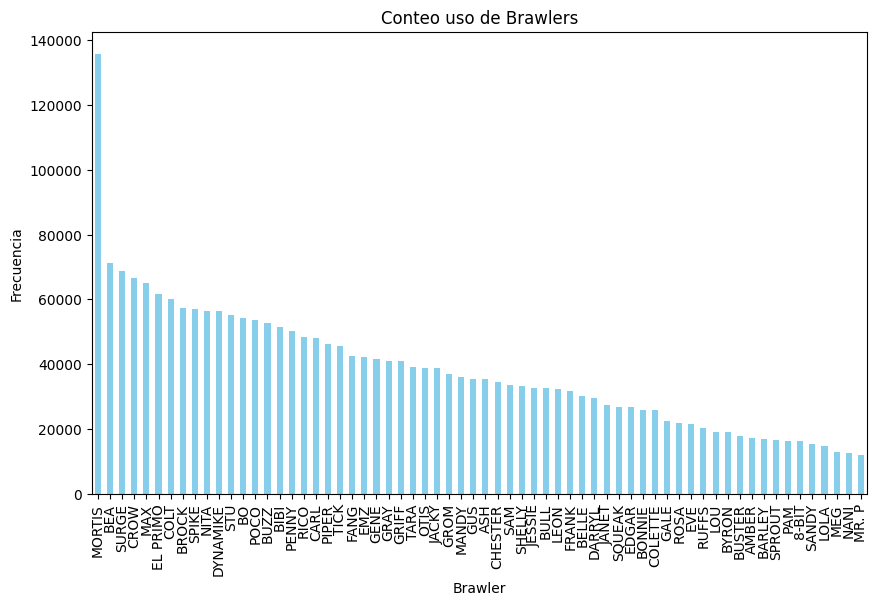

In [47]:
# Gráfico de barras
plt.figure(figsize=(10, 6))
conteo_brawlers.plot(kind='bar', color='skyblue')
plt.title('Conteo uso de Brawlers')
plt.xlabel('Brawler')
plt.ylabel('Frecuencia')
plt.show()

## Expancion de datos
---
🤯Una ves que se han obtenido los datos sin duplicidad se van a expandir los datos para crear dos dataframes nuevos:


*   Data Frame de Brawlers
*   Data frame de Gears

Estos DF seran vinculados a los jugadores por ID

---

In [48]:
#convertir la columna brawlers a una lista
metadata_ND['brawlers'] = metadata_ND['brawlers'].map(eval)

In [49]:
type(metadata_ND.brawlers[0])

list

In [50]:
# Crear una lista para almacenar los DataFrames individuales de brawlers
brawlers_list = []

# Iterar sobre las filas y agregar cada conjunto de brawlers al DataFrame
for index, row in metadata_ND.iterrows():
    brawlers_df = pd.DataFrame(row['brawlers'])
    brawlers_df['player_id'] = row['player_id']
    brawlers_list.append(brawlers_df)

# Concatenar todos los DataFrames individuales en uno solo
brawlers_combined = pd.concat(brawlers_list, ignore_index=True)

In [51]:
# Mostrar las primeras filas del DataFrame combinado
brawlers_combined.head()

,id,name,power,rank,trophies,highestTrophies,gears,starPowers,gadgets,player_id
0,16000000,SHELLY,10,30,792,1000,"[{'id': 62000002, 'name': 'DAMAGE', 'level': 3...","[{'id': 23000076, 'name': 'SHELL SHOCK'}, {'id...","[{'id': 23000255, 'name': 'FAST FORWARD'}, {'i...",#YYYQJ8VG
1,16000001,COLT,10,30,920,1023,"[{'id': 62000002, 'name': 'DAMAGE', 'level': 3...","[{'id': 23000077, 'name': 'SLICK BOOTS'}, {'id...","[{'id': 23000273, 'name': 'SPEEDLOADER'}, {'id...",#YYYQJ8VG
2,16000002,BULL,10,28,874,909,"[{'id': 62000006, 'name': 'SUPER CHARGE', 'lev...","[{'id': 23000078, 'name': 'BERSERKER'}, {'id':...","[{'id': 23000272, 'name': 'T-BONE INJECTOR'}, ...",#YYYQJ8VG
3,16000003,BROCK,10,30,885,1039,"[{'id': 62000005, 'name': 'RELOAD SPEED', 'lev...","[{'id': 23000079, 'name': 'MORE ROCKETS!'}, {'...","[{'id': 23000245, 'name': 'ROCKET LACES'}, {'i...",#YYYQJ8VG
4,16000004,RICO,10,30,849,1005,"[{'id': 62000005, 'name': 'RELOAD SPEED', 'lev...","[{'id': 23000080, 'name': 'SUPER BOUNCY'}, {'i...","[{'id': 23000246, 'name': 'MULTIBALL LAUNCHER'...",#YYYQJ8VG



---
Como se puede visualizar en la salida de la celda anterior, el DF de brawlers aun cuenta con 3 columnas que tienen diccionarios de datos como valores.


En caso de ser necesario es posible expandir estas 3 columnas en data frames individuales y vincularlos por el ID o nombre del brawler.

**En este caso unicamente haremos el analisis de la columna de gears.**

---

In [52]:
brawlers_combined.to_csv("brawlers_SD.csv")

### Expancion de gears
---
⚙
Creacion de un data frame de los gears para la visualizacion de uso de cada uno de estos

---

In [53]:
import pandas as pd
brawlers = pd.read_csv('/kaggle/input/brawlstarsprofundidad/brawlers_SD.csv')
brawlers.head()

,Unnamed: 0,id,name,power,rank,trophies,highestTrophies,gears,starPowers,gadgets,player_id
0,0,16000000,SHELLY,11,24,574,735,"[{'id': 62000002, 'name': 'DAMAGE', 'level': 3...","[{'id': 23000076, 'name': 'SHELL SHOCK'}, {'id...","[{'id': 23000255, 'name': 'FAST FORWARD'}, {'i...",#8Y9QGR0U
1,1,16000001,COLT,11,30,649,1010,"[{'id': 62000002, 'name': 'DAMAGE', 'level': 3...","[{'id': 23000077, 'name': 'SLICK BOOTS'}, {'id...","[{'id': 23000273, 'name': 'SPEEDLOADER'}, {'id...",#8Y9QGR0U
2,2,16000002,BULL,11,23,599,674,"[{'id': 62000000, 'name': 'SPEED', 'level': 3}...","[{'id': 23000078, 'name': 'BERSERKER'}, {'id':...","[{'id': 23000272, 'name': 'T-BONE INJECTOR'}, ...",#8Y9QGR0U
3,3,16000003,BROCK,11,30,574,1015,"[{'id': 62000002, 'name': 'DAMAGE', 'level': 3...","[{'id': 23000079, 'name': 'MORE ROCKETS!'}, {'...","[{'id': 23000245, 'name': 'ROCKET LACES'}, {'i...",#8Y9QGR0U
4,4,16000004,RICO,11,25,624,759,"[{'id': 62000002, 'name': 'DAMAGE', 'level': 3...","[{'id': 23000080, 'name': 'SUPER BOUNCY'}, {'i...","[{'id': 23000246, 'name': 'MULTIBALL LAUNCHER'...",#8Y9QGR0U


In [54]:
type(brawlers.gears[0])

str

In [55]:
brawlers['gears'] = brawlers['gears'].map(eval)

In [56]:
type(brawlers_combined.gears[0])

list

---
El proceso de expansion de los datos que estamos utilizando, en automatico omite los diccionarios de datos vacios, lo cual reduce el numero de registros para algunos gears, sin embargo al estar vinculados por *name* al DF de brawlers es posible visualizar los gears mas usados o adquiridos para cada brawler, entre otras acciones.

---

In [ ]:
# Crear una lista para almacenar los DataFrames individuales de gears
gears = []

# Iterar sobre las filas y agregar cada conjunto de gears al DataFrame
for index, row in brawlers_combined.iterrows():
    gears_df = pd.DataFrame(row['gears'])
    gears_df['player_id'] = row['player_id']
    gears_df['brawler_name'] = row['name']
    gears.append(gears_df)

# Concatenar todos los DataFrames individuales en uno solo
gears_B = pd.concat(gears, ignore_index=True)

In [58]:
# Mostrar las primeras filas del DataFrame combinado
gears_B.head()

,id,name,level,player_id,brawler_name
0,62000002.0,DAMAGE,3.0,#YYYQJ8VG,SHELLY
1,62000000.0,SPEED,3.0,#YYYQJ8VG,SHELLY
2,62000002.0,DAMAGE,3.0,#YYYQJ8VG,COLT
3,62000004.0,SHIELD,3.0,#YYYQJ8VG,COLT
4,62000005.0,RELOAD SPEED,3.0,#YYYQJ8VG,COLT


🔼 Con este tipo de expancion de datos, podemos ver todos los brawlers que tiene cada jugador y los gears que a comprado para cada uno de sus brawlers 🔼

---

In [59]:
gears_B.to_csv('gears.csv')

# Analisis de los jugadores de BrawlStars

En esta seccion se hizo uso de Oracle Analitycs para filtrar los jugadores por candidatos a la copa mundial y no candidatos.
Esto con la finalidad de entontrar una relacion entre el promedio de victorias y derrotas de ambos grupos
 de jugadores y tratar de visualizar una relacion entre los calificados y no calificados

 ---

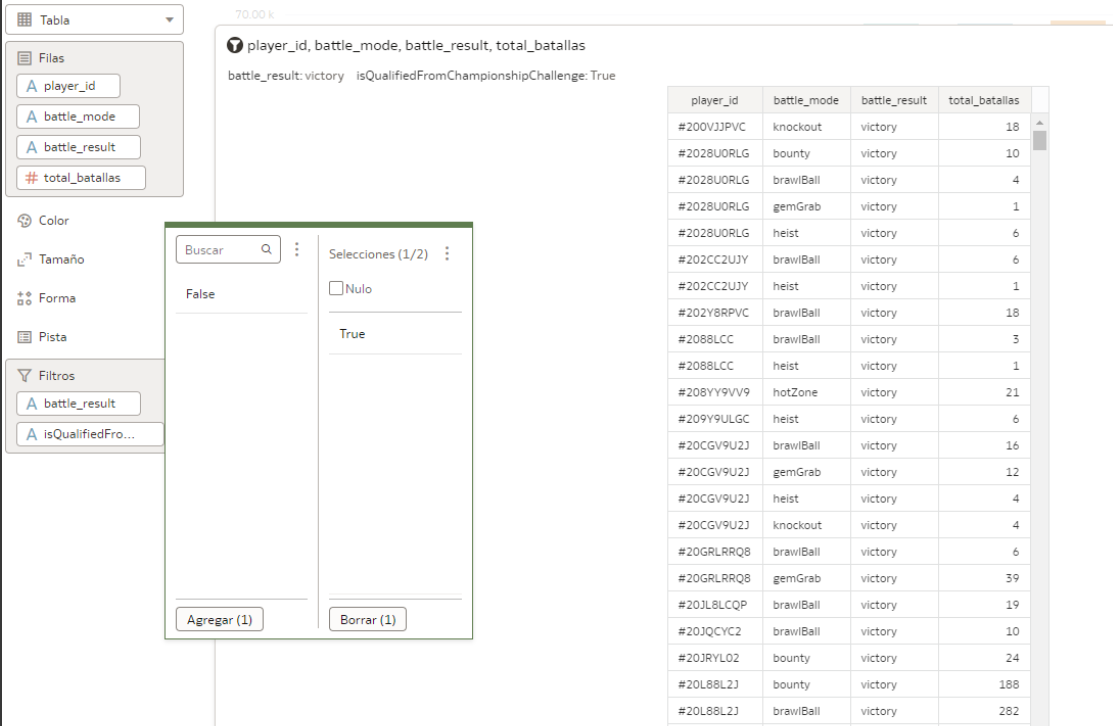

---
Una vez exportados los datos desde Oracle Analitycs se hace uso de ellos en este notebook

## Jugadores calificados para la copa

In [60]:
#Relacion entre promedio de victorias y derrotas para ser Pro player?
victorias_pros = pd.read_csv('/kaggle/input/brawlstarsprofundidad/victorias_pro_players.csv')
victorias_pros.head()

,player_id,battle_mode,battle_result,total_batallas
0,#200VJJPVC,knockout,victory,18
1,#2028U0RLG,bounty,victory,10
2,#2028U0RLG,brawlBall,victory,4
3,#2028U0RLG,gemGrab,victory,1
4,#2028U0RLG,heist,victory,6


In [61]:
#Calcular el promedio de victorias de todos los jugadores pro
wins_pro = victorias_pros['total_batallas'].mean()
print(wins_pro)

26.99467518636848


In [62]:
derrotas = pd.read_csv('/kaggle/input/brawlstarsprofundidad/derrotas_pro_players.csv')
derrotas.head()

,player_id,battle_mode,battle_result,total_batallas
0,#200VJJPVC,knockout,defeat,7
1,#2028U0RLG,brawlBall,defeat,2
2,#2028U0RLG,gemGrab,defeat,2
3,#202CC2UJY,brawlBall,defeat,13
4,#202Y8RPVC,brawlBall,defeat,36


In [63]:
#Calcular el promedio de derrotas de todos los jugadores pro
defeat_pro = derrotas['total_batallas'].mean()
print(defeat_pro)

19.150380339379755


## Jugadores no calificados para la copa

In [64]:
derrotasNP = pd.read_csv('/kaggle/input/brawlstarsprofundidad/derrotasnopros.csv')
derrotasNP.head()

,player_id,battle_mode,battle_result,total_batallas
0,#20020PQQ,brawlBall,defeat,14
1,#2002L2R8G,brawlBall,defeat,4
2,#2002L2R8G,heist,defeat,3
3,#2002L2R8G,knockout,defeat,3
4,#2002PV0CY,bounty,defeat,1


In [65]:
#Calcular el promedio de derrotas de todos los jugadores pro
defeat_np = derrotasNP['total_batallas'].mean()
print(defeat_np)

8.310170523751523


In [66]:
winsNP = pd.read_csv('/kaggle/input/brawlstarsprofundidad/winsNoPros.csv')
winsNP.head()

,player_id,battle_mode,battle_result,total_batallas
0,#20020PQQ,brawlBall,victory,11
1,#2002L2R8G,brawlBall,victory,8
2,#2002L2R8G,heist,victory,5
3,#2002L2R8G,knockout,victory,1
4,#2002PV0CY,bounty,victory,1


In [67]:
#Calcular el promedio de derrotas de todos los jugadores pro
wins_np = winsNP['total_batallas'].mean()
print(wins_np)

10.900016860563143


# Analisis de los modos de juego

In [68]:
batallas = pd.read_csv("/kaggle/input/brawl-stars-logs-and-metadata-2023/raw_battlelogs.csv")

In [69]:
batallas.head()

,battleTime,event_id,event_mode,event_map,battle_mode,battle_type,battle_result,battle_duration,battle_trophyChange,battle_starPlayer_tag,...,player_id,battle_starPlayer,battle_bigBrawler_tag,battle_bigBrawler_name,battle_bigBrawler_brawler_id,battle_bigBrawler_brawler_name,battle_bigBrawler_brawler_power,battle_bigBrawler_brawler_trophies,battle_level_name,battle_level_id
0,20230210T160712.000Z,15000012,gemGrab,Deep Diner,gemGrab,ranked,defeat,125.0,-8.0,#9V9QVV99V,...,#8Y9QGR0U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20230210T160425.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,46.0,-8.0,#8GRC2PJRC,...,#8Y9QGR0U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20230210T160150.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,89.0,-7.0,#Q2P0U08C,...,#8Y9QGR0U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20230210T155921.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,defeat,150.0,-7.0,#2UG2LU09G,...,#8Y9QGR0U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20230210T155529.000Z,15000050,brawlBall,Sneaky Fields,brawlBall,ranked,victory,65.0,8.0,#8Y9QGR0U,...,#8Y9QGR0U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
promedibatallas = batallas['battle_duration'].mean()
print(promedibatallas)

105.46421982740031
